In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
tfds.list_builders()

In [5]:
dataset, info = tfds.load(name='mnist', with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incompleteVMMYYK',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [6]:
print(info.splits)

{'test': <SplitInfo num_examples=10000, num_shards=1>, 'train': <SplitInfo num_examples=60000, num_shards=1>}


In [5]:
print(info.splits['train'].num_examples)


60000


In [6]:
ds_train = tfds.load(name='mnist', split = "train[:80%]", as_supervised=True)
ds_val = tfds.load(name='mnist', split = "train[-20%:]", as_supervised=True)

In [7]:
print(len(ds_train))
print(len(ds_val))


48000
12000


In [8]:
ds_train.element_spec

(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [9]:
ds_train_b = ds_train.batch(32)
ds_val_b = ds_val.batch(32)

Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 1.9588 - accuracy: 0.8662 - val_loss: 0.5685 - val_accuracy: 0.8962
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4148 - accuracy: 0.9206 - val_loss: 0.4548 - val_accuracy: 0.9085
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3037 - accuracy: 0.9354 - val_loss: 0.3870 - val_accuracy: 0.9309
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2404 - accuracy: 0.9455 - val_loss: 0.2761 - val_accuracy: 0.9373
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1753 - accuracy: 0.9553 - val_loss: 0.2260 - val_accuracy: 0.9476
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1533 - accuracy: 0.9603 - val_loss: 0.1994 - val_accuracy: 0.9522
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1251 - accuracy: 0.9641 - val_loss: 0.1815 - val_accuracy

Text(0.5, 1.0, 'Training and validation loss')

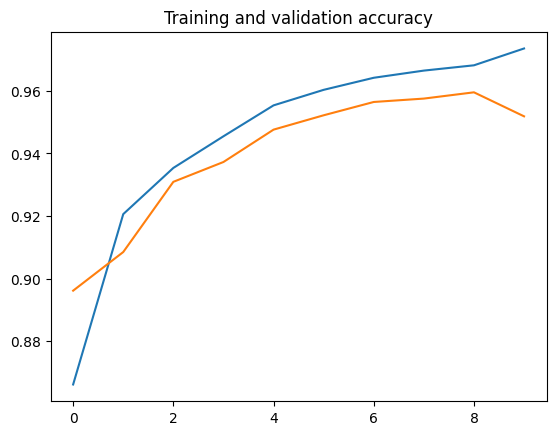

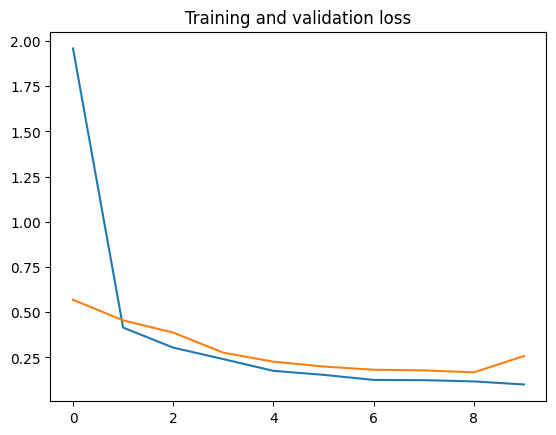

In [10]:
model = tf.keras.Sequential([
  #layers.Flatten(input_shape=(28, 28)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train_b,
          epochs=10,
          validation_data=ds_val_b)

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )